In [8]:
# Instalação das dependências
!pip install numpy scipy matplotlib networkx


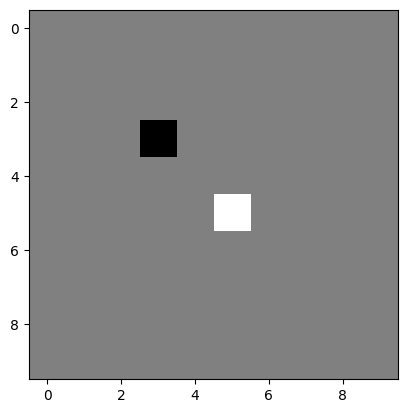

In [9]:
# Mapeamento do ambiente
import numpy as np
import matplotlib.pyplot as plt

class Environment:
    def __init__(self, size):
        self.size = size
        self.grid = np.zeros((size, size))

    def add_obstacle(self, position):
        self.grid[position] = -1  # -1 representa um obstaculo

    def add_dirty_area(self, position):
        self.grid[position] = 1  # 1 representa a área suja

    def show(self):
        plt.imshow(self.grid, cmap='gray')
        plt.show()

env = Environment(10)
env.add_obstacle((3, 3))
env.add_dirty_area((5, 5))
env.show()


In [10]:
# Detecção de sujeira
class Sensor:
    def __init__(self, environment):
        self.environment = environment

    def detect_dirty_areas(self):
        dirty_areas = np.argwhere(self.environment.grid == 1)
        return dirty_areas

sensor = Sensor(env)
dirty_areas = sensor.detect_dirty_areas()
print("Dirty areas detected at:", dirty_areas)


Dirty areas detected at: [[5 5]]


In [11]:
# Planejamento de rotas
import heapq

def heuristic(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))

def a_star(environment, start, goal):
    neighbors = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    close_set = set()
    came_from = {}
    gscore = {start: 0}
    fscore = {start: heuristic(start, goal)}
    oheap = []
    heapq.heappush(oheap, (fscore[start], start))

    while oheap:
        current = heapq.heappop(oheap)[1]

        if current == goal:
            data = []
            while current in came_from:
                data.append(current)
                current = came_from[current]
            return data[::-1]

        close_set.add(current)
        for i, j in neighbors:
            neighbor = current[0] + i, current[1] + j
            tentative_g_score = gscore[current] + heuristic(current, neighbor)
            if 0 <= neighbor[0] < environment.size:
                if 0 <= neighbor[1] < environment.size:
                    if environment.grid[neighbor[0]][neighbor[1]] == -1:
                        continue
                else:
                    continue
            else:
                continue

            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                continue

            if tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1] for i in oheap]:
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(oheap, (fscore[neighbor], neighbor))

    return False

path = a_star(env, (0, 0), (5, 5))
print("Path:", path)


Path: [(0, 1), (1, 1), (1, 2), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4), (4, 5), (5, 5)]


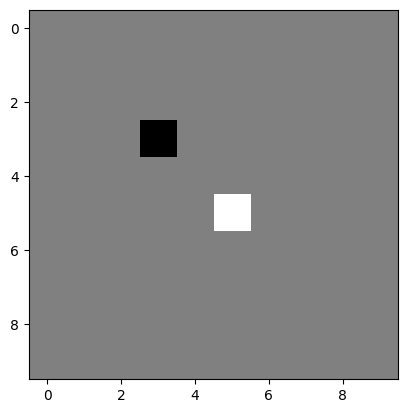

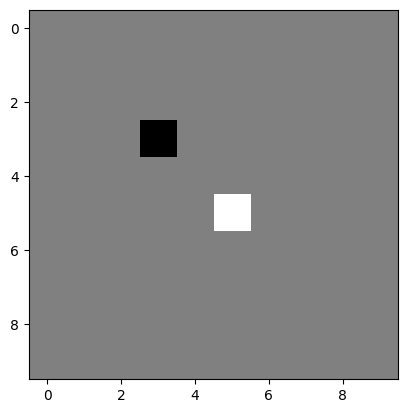

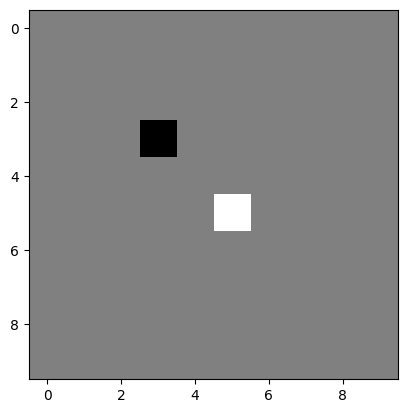

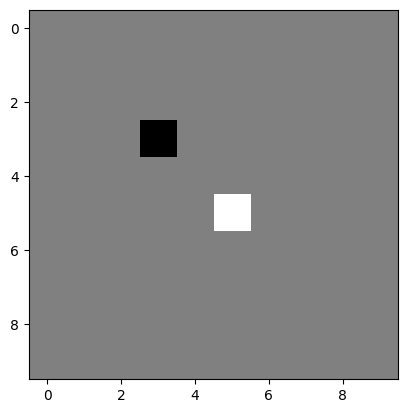

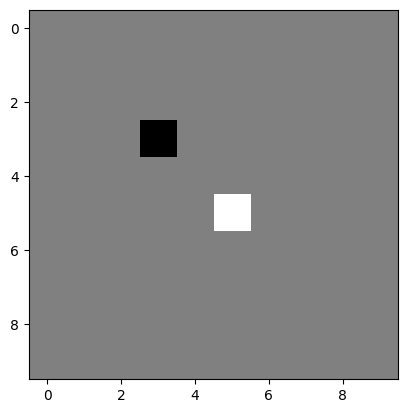

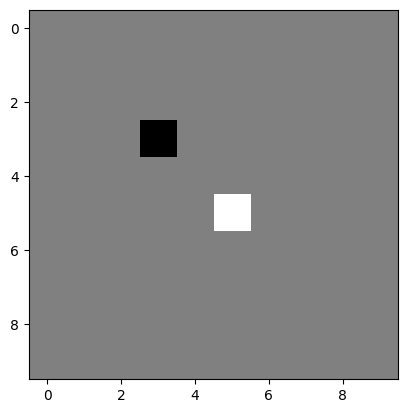

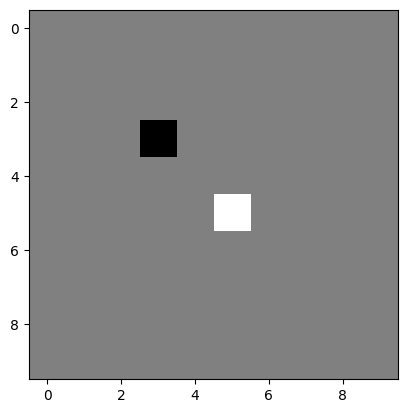

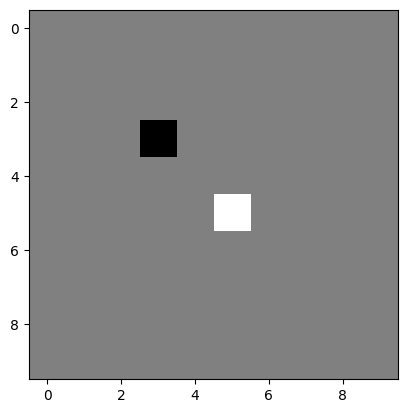

Agent 2 cleaned position (5, 5)


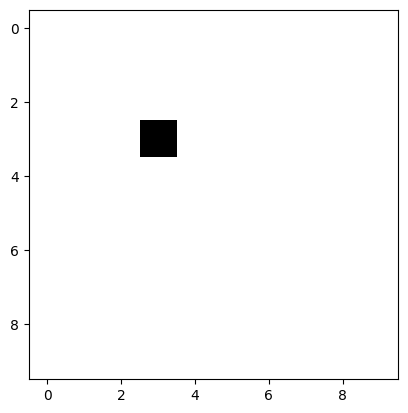

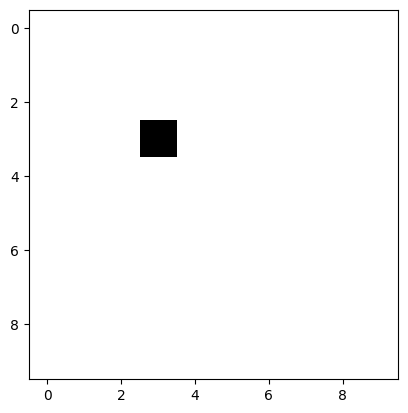

In [12]:
# Coordenação de Multiagente
class Agent:
    def __init__(self, id, environment, start_pos):
        self.id = id
        self.environment = environment
        self.position = start_pos
        self.path = []

    def move(self):
        if self.path:
            self.position = self.path.pop(0)

    def set_path(self, path):
        self.path = path

    def detect_and_clean(self):
        if self.environment.grid[self.position] == 1:
            self.environment.grid[self.position] = 0
            print(f"Agent {self.id} cleaned position {self.position}")

agents = [Agent(1, env, (0, 0)), Agent(2, env, (0, 9))]

# Exemplo de caminhos
paths = [
    a_star(env, agents[0].position, (5, 5)),
    a_star(env, agents[1].position, (5, 5))
]

for agent, path in zip(agents, paths):
    agent.set_path(path)

# Simula os agentes se movendo e limpando
for _ in range(10):
    for agent in agents:
        agent.move()
        agent.detect_and_clean()
    env.show()
